In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## Read the data from Consumer_Complaints.csv

In [2]:
consumer_complaints = pd.read_csv("Consumer_Complaints.csv", low_memory=False)
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


### Index the data by date

In [3]:
consumer_complaints.index = pd.to_datetime(consumer_complaints.pop("Date received"), format="%m/%d/%Y")

In [4]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,Navy FCU,In progress,Yes,NaN
2015-05-22,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [5]:
consumer_complaints.tail()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2011-12-01,2352,Credit card,NaN,Credit determination,NaN,NY,13350,Web,12/05/2011,Capital One,Closed without relief,Yes,Yes
2011-12-01,2366,Credit card,NaN,Credit reporting,NaN,FL,33415,Referral,12/06/2011,Citibank,Closed without relief,Yes,Yes
2011-12-01,2368,Credit card,NaN,Credit line increase/decrease,NaN,FL,32792,Web,12/05/2011,Citibank,Closed without relief,Yes,No
2011-12-01,2371,Credit card,NaN,Other fee,NaN,HI,96813,Web,12/19/2011,Capital One,Closed without relief,Yes,No
2011-12-01,2374,Credit card,NaN,Payoff process,NaN,CA,94108,Phone,12/05/2011,Capital One,Closed without relief,Yes,Yes


In [6]:
consumer_complaints = consumer_complaints.fillna(0)

## Number of complaints by month

In [7]:
monthly = consumer_complaints.Product.resample("M", how=["count"])[:-1]

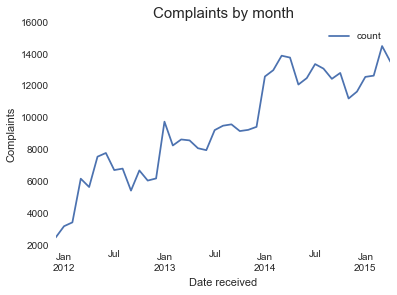

In [8]:
monthly.plot(c="green")
plt.ylabel("Complaints")
plt.title("Complaints by month", fontsize=15)
plt.show()

## Number of complaints by product

In [9]:
comp_by_products = consumer_complaints["Product"].value_counts()
comp_by_products

Mortgage                   146533
Debt collection             65639
Credit reporting            57299
Credit card                 49772
Bank account or service     45851
Consumer loan               13186
Student loan                11873
Payday loan                  2540
Money transfers              2249
Prepaid card                  699
Other financial service       212
dtype: int64

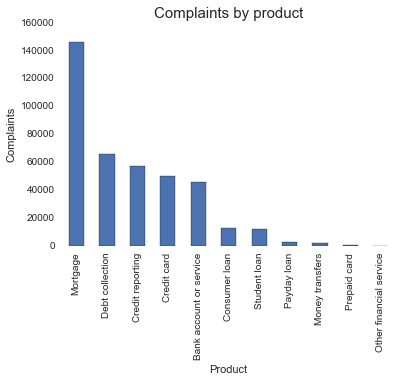

In [10]:
comp_by_products.plot('bar')
plt.title("Complaints by product", fontsize=15)
plt.xlabel("Product")
plt.ylabel("Complaints")
plt.show()

## Number of complaints by company

In [11]:
comp_by_company = consumer_complaints["Company"].value_counts()
comp_by_company[0:10]

Bank of America        46908
Wells Fargo            32992
JPMorgan Chase         26177
Experian               20190
Citibank               19578
Equifax                19572
Ocwen                  16864
TransUnion             15329
Capital One            12073
Nationstar Mortgage     9728
dtype: int64

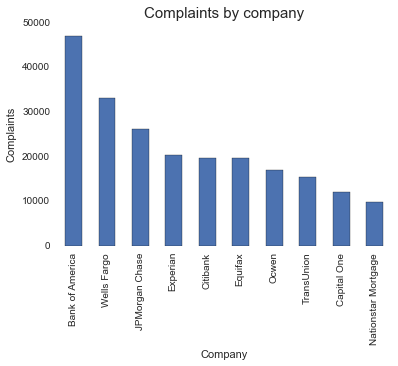

In [12]:
comp_by_company[0:10].plot('bar')
plt.title("Complaints by company", fontsize=15)
plt.xlabel("Company")
plt.ylabel("Complaints")
plt.show()

## Number of complaints by Company response

In [13]:
comp_by_response = consumer_complaints["Company response"].value_counts()

In [14]:
comp_by_response

Closed with explanation            279287
Closed with non-monetary relief     50502
Closed with monetary relief         28145
Closed without relief               17909
Closed                               9599
Closed with relief                   5305
In progress                          3222
Untimely response                    1884
dtype: int64

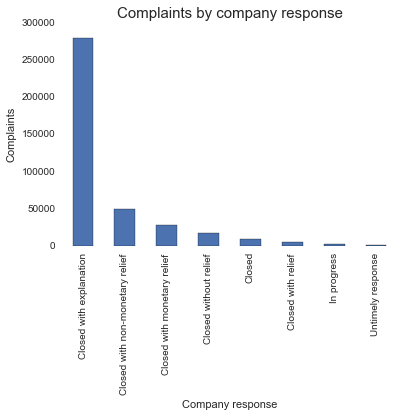

In [15]:
comp_by_response.plot("bar")
plt.title("Complaints by company response", fontsize=15)
plt.xlabel("Company response")
plt.ylabel("Complaints")
plt.show()

In [16]:
#consumer_complaints.index.to_series().map(lambda d: d.weekday())

In [17]:
dow = ["M", "Tu", "W", "Th", "F", "Sa", "Su"]
consumer_complaints["day_of_week"] = consumer_complaints.index.to_series().map(lambda d: d.weekday())

In [18]:
consumer_complaints.day_of_week.value_counts()


2    76551
1    74587
3    73204
0    71713
4    64280
5    19214
6    16304
dtype: int64

In [19]:
data = consumer_complaints.day_of_week.value_counts().sort_index()
data.index = dow

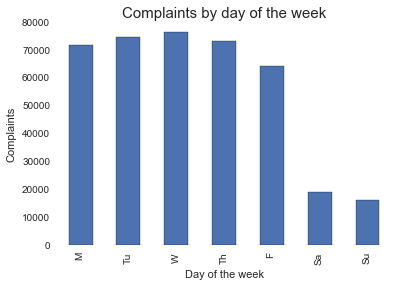

In [20]:
data.plot('bar')
plt.title("Complaints by day of the week", fontsize=15)
plt.xlabel("Day of the week")
plt.ylabel("Complaints")
plt.show()

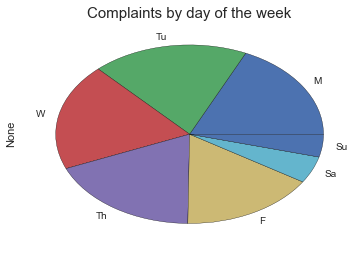

In [21]:
data.plot('pie')
plt.title("Complaints by day of the week", fontsize=15)
plt.show()

In [22]:
mean = data / 181

In [23]:
mean

M     396.204420
Tu    412.082873
W     422.933702
Th    404.441989
F     355.138122
Sa    106.154696
Su     90.077348
dtype: float64

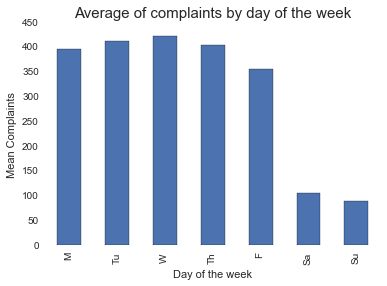

In [24]:
mean.plot('bar')
plt.title("Average of complaints by day of the week", fontsize=15)
plt.xlabel("Day of the week")
plt.ylabel("Mean Complaints")
plt.show()

# US Population

In [25]:
population = pd.read_csv("population.csv")
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2014,POPEST18PLUS2014,PCNT_POPEST18PLUS
0,10,0,0,0,United States,318857056,245273438,76.9
1,40,3,6,1,Alabama,4849377,3741806,77.2
2,40,4,9,2,Alaska,736732,550189,74.7
3,40,4,8,4,Arizona,6731484,5109792,75.9
4,40,3,7,5,Arkansas,2966369,2259350,76.2


In [26]:
population.index = population.pop("NAME")

In [27]:
population

,SUMLEV,REGION,DIVISION,STATE,POPESTIMATE2014,POPEST18PLUS2014,PCNT_POPEST18PLUS
NAME,,,,,,,
United States,10,0,0,0,318857056,245273438,76.9
Alabama,40,3,6,1,4849377,3741806,77.2
Alaska,40,4,9,2,736732,550189,74.7
Arizona,40,4,8,4,6731484,5109792,75.9
Arkansas,40,3,7,5,2966369,2259350,76.2
California,40,4,9,6,38802500,29649348,76.4
Colorado,40,4,8,8,5355866,4109494,76.7
Connecticut,40,1,1,9,3596677,2821247,78.4
Delaware,40,3,5,10,935614,731367,78.2


In [28]:
population = population.replace('X', 0)

In [29]:
population


,SUMLEV,REGION,DIVISION,STATE,POPESTIMATE2014,POPEST18PLUS2014,PCNT_POPEST18PLUS
NAME,,,,,,,
United States,10,0,0,0,318857056,245273438,76.9
Alabama,40,3,6,1,4849377,3741806,77.2
Alaska,40,4,9,2,736732,550189,74.7
Arizona,40,4,8,4,6731484,5109792,75.9
Arkansas,40,3,7,5,2966369,2259350,76.2
California,40,4,9,6,38802500,29649348,76.4
Colorado,40,4,8,8,5355866,4109494,76.7
Connecticut,40,1,1,9,3596677,2821247,78.4
Delaware,40,3,5,10,935614,731367,78.2


In [32]:
comp_by_state = consumer_complaints.groupby("State").size()

In [33]:
comp_by_state

State
0      5491
AA       10
AE      147
AK      478
AL     3842
AP      113
AR     1670
AS       13
AZ     8678
CA    58603
CO     6792
CT     4758
DC     2300
DE     2105
FL    38037
FM       21
GA    17085
GU       40
HI     1434
IA     1610
ID     1308
IL    13808
IN     4291
KS     1907
KY     2773
LA     3687
MA     8070
MD    12720
ME     1402
MH       21
      ...  
MP       17
MS     1755
MT      655
NC    10871
ND      324
NE     1255
NH     2200
NJ    16113
NM     1907
NV     4558
NY    27034
OH    12323
OK     2564
OR     4662
PA    14188
PR      831
PW        8
RI     1427
SC     4755
SD      543
TN     5790
TX    28764
UT     2086
VA    12736
VI       82
VT      705
WA     8064
WI     4473
WV      997
WY      403
dtype: int64